Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
模型准确率: 0.83
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



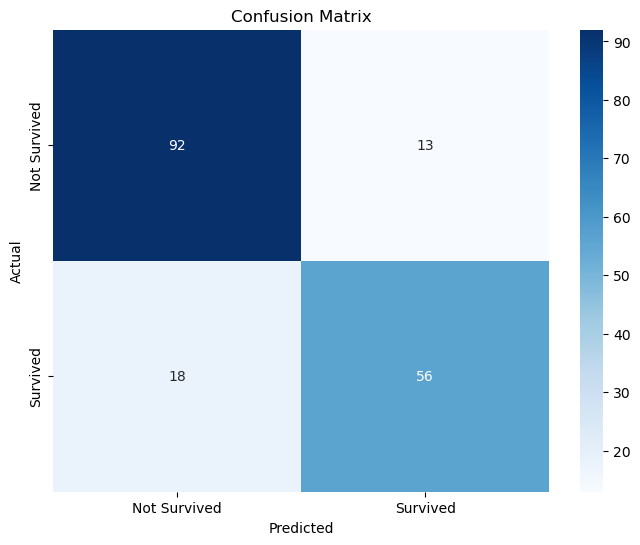

In [18]:
#引入包依赖
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#读入本地的数据集
data=pd.read_csv(r'e:\TANTANNIC\data\titanic.csv  ')

#查看data的所有列名
print(data.columns)


#数据预处理
data['Sex']=data['Sex'].map({'male':0,'female':1})  #将性别转换为数值型
data['Age']=data['Age'].fillna(data['Age'].median())  #填充年龄的缺失值
data['Fare']=data['Fare'].fillna(data['Fare'].median())  #填充票价的缺失值
data['Embarked']=data['Embarked'].map({'C':0,'Q':1,'S':2})  #将登船港口转换为数值型

#补充增加特征
data['TicketPrefix']=data['Ticket'].apply(lambda x :str(x)[0])
data['TicketPrefix']=data['TicketPrefix'].map(lambda x :ord(x)).fillna(0)  #将票号的首字母转换为ASCII码


#确定表亲以及特征
features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','TicketPrefix']
X=data[features]  #特征的矩阵
Y=data['Survived']#是否存活的标签

#划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#训练模型
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train, Y_train)

#预测测试集
Y_pred=clf.predict(X_test)
acc=accuracy_score(Y_test,Y_pred)
print(f'模型准确率: {acc:.2f}')

#输出分类报告
print(classification_report(Y_test,Y_pred))


#输出混淆矩阵
cm=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




#保存模型
import pickle
with open('../model/titanic_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

